## Exploring the listings_df dataset

- What are the most common types of properties listed on Airbnb?
- How does the availability of listings change over time?
- What is the average price of listings in different neighborhoods?
- Are there any specific amenities that are commonly offered in Airbnb listings?
- What is the distribution of review scores for the listed properties?
- Is there a correlation between the number of reviews and the overall rating of a listing?
- Are there any seasonal patterns in the pricing of listings?
- Which hosts have the highest number of listings?
- What are the most frequent cancellation policies chosen by hosts?
- Are there any correlations between the number of bedrooms, bathrooms, and the price of a listing?
- What is the distribution of property sizes (in terms of square feet) among the listings?
- How many listings have missing values for important attributes like description or review scores?
- How many listings have a minimum stay requirement of more than a certain number of nights?
- Are there any differences in review scores based on the instant bookability of a listing?
- Can we identify any outliers or unusual patterns in the data, such as extremely high prices or low review scores?

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Load the calendar dataset
calendar_df = pd.read_csv('calendar.csv')

# Load the listings dataset
listings_df = pd.read_csv('listings.csv')


In [3]:
listings_df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

##### Let us check for null values and remove columns that are not necessary


In [6]:
high_null_columns = (listings_df.columns[listings_df.isnull().mean() > 0.90])
high_null_columns

Index(['neighbourhood_group_cleansed', 'square_feet', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

In [7]:
half_null_columns = (listings_df.columns[listings_df.isnull().mean() > 0.50])
half_null_columns

Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [8]:
#Drop all these columns
listings_df.drop(high_null_columns,axis=1,inplace=True)

In [16]:
#Most common types of rooms
listings_df['room_type'].value_counts()

room_type
Entire home/apt    2127
Private room       1378
Shared room          80
Name: count, dtype: int64

In [10]:
#Most common type of beds
listings_df['bed_type'].value_counts()

bed_type
Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: count, dtype: int64

In [11]:
listings_df['price'].describe()

count        3585
unique        324
top       $150.00
freq          144
Name: price, dtype: object

In [12]:
columns_with_dollar_sign = []

# Iterate over the column names
for column in listings_df.columns:
    if listings_df[column].dtype == 'O':
    # Check if the column name contains "$"
        if listings_df[column].str.contains('\$').any():
            columns_with_dollar_sign.append(column)

# Print the column names with "$" sign
print(columns_with_dollar_sign)

['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']


In [18]:
columns_with_price = [ 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for column in columns_with_price:
    listings_df[column] = listings_df[column].str.replace('$', '').str.replace(',', '').astype(float)
listings_df[columns_with_price].describe()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
count,3585.000000,892.000000,888.000000,1342.000000,2478.000000,3585.000000
mean,173.925802,922.392377,3692.097973,324.698212,68.380145,10.886192
std,148.331321,657.821817,2899.963733,328.873075,51.297835,19.137773
min,10.000000,80.000000,500.000000,95.000000,5.000000,0.000000
25%,85.000000,466.750000,1600.000000,100.000000,25.000000,0.000000
50%,150.000000,750.000000,2925.000000,250.000000,50.000000,0.000000
75%,220.000000,1200.000000,5000.000000,450.000000,100.000000,20.000000
max,4000.000000,5000.000000,40000.000000,4500.000000,300.000000,200.000000


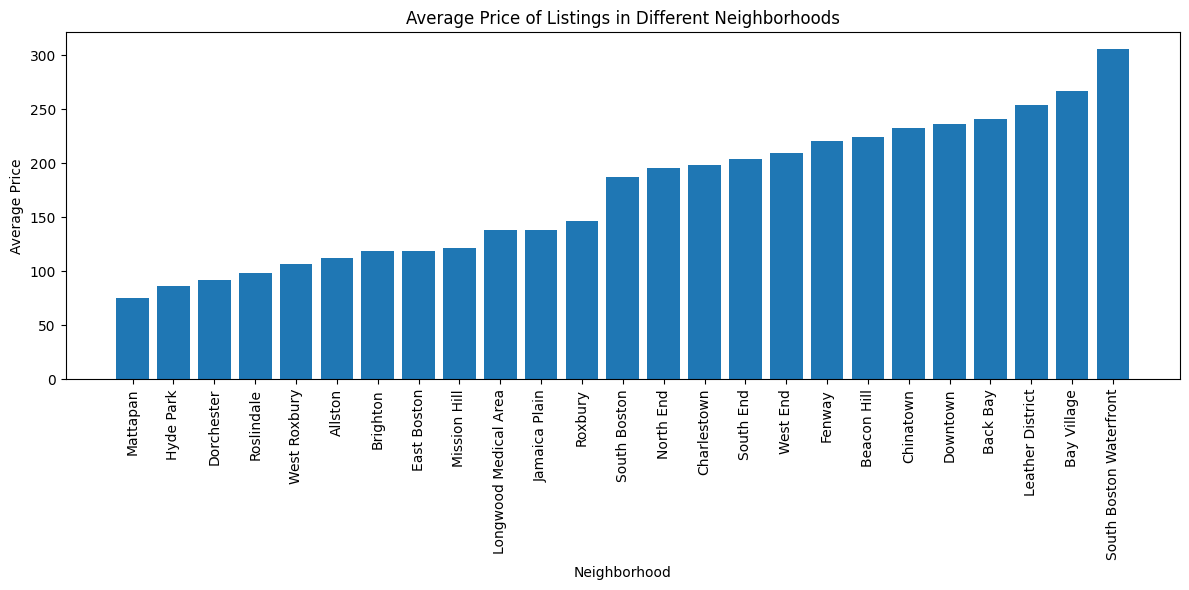

In [21]:
average_price_neighborhood = listings_df.groupby("neighbourhood_cleansed")["price"].mean()
sorted_neighborhoods = average_price_neighborhood.sort_values()

# Plotting the average prices
plt.figure(figsize=(12, 6))
plt.bar(sorted_neighborhoods.index, sorted_neighborhoods.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Average Price of Listings in Different Neighborhoods")
plt.tight_layout()
plt.show()

In [ ]:
#Understanding the most commonly given out amenities.

In [ ]:
amenities_list = listings_df['amenities'].tolist()
all_amenities = [amenity.strip('"') for amenities in amenities_list for amenity in amenities.strip('{}').split(',')]
from collections import Counter
amenities_count = Counter(all_amenities)
amenities_count
common_amenities = sorted(amenities_count.items(), key=lambda x: x[1], reverse=True)
common_amenities
# Extract the top 10 amenities and their frequencies
top_amenities = common_amenities[:15]
amenities, counts = zip(*top_amenities)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=amenities, autopct='%1.1f%%')
plt.title('Distribution of Commonly Offered Amenities')

# Display the chart
plt.show()

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

              bedrooms  bathrooms  accommodates     price
bedrooms      1.000000   0.430854      0.724826  0.385298
bathrooms     0.430854   1.000000      0.346914  0.248234
accommodates  0.724826   0.346914      1.000000  0.437756
price         0.385298   0.248234      0.437756  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns from the DataFrame
selected_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_listings_count', 'extra_people', 'review_scores_rating', 'price']
selected_df = listings_df[selected_cols]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
